# Logistic Regression

- Student ID: 20120128
- Student name: Nguyễn Thị Cẩm Lai



<a name="1"></a>
# 1. Import Library

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from map_feature import *
import copy
import math

# 2. Read & Analyze Data

### 2.1 Read dataset

In [2]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

In [3]:
# load dataset
X_train, y_train = load_data("training_data.txt")

print ('The shape of X_train: ' + str(X_train.shape))
print ('The shape of y_train: ' + str(y_train.shape))
print ('We have %d training examples' % (len(y_train)))

The shape of X_train: (118, 2)
The shape of y_train: (118,)
We have 118 training examples


**Comment:**

Explain the dataset:

- `X_train`: contains the test results for the microchips from two tests (2 attribute).
- `y_train`: product test results microchips (1 attribute).
    - `y_train` = 0 : microchips rejected
    - `y_train` = 1 : microchips accepted

### 2.2 View the variables

In [4]:
# print X_train
print("X_train:", X_train[:3])
print("Type of X_train:", type(X_train))

# print y_train
print("y_train:", y_train[:3])
print("Type of y_train:", type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


### 2.3 Data visualization

In [5]:
def plot_data(X, y, positive_label = "y=1", negative_label = "y=0"):
    positive = y == 1
    negative = y == 0
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=positive_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=negative_label)

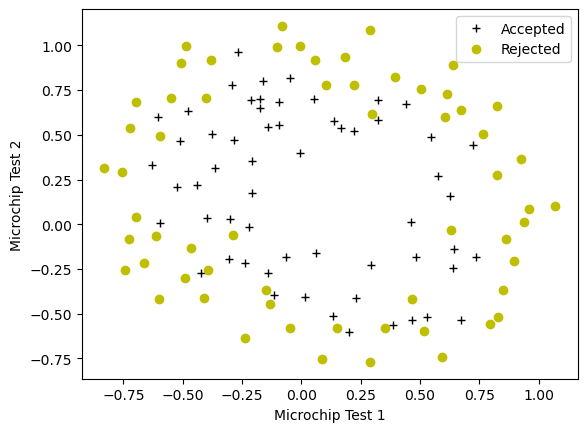

In [6]:
# Plot examples
plot_data(X_train, y_train[:], positive_label = "Accepted", negative_label = "Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
# Set the legend
plt.legend(loc="upper right")
plt.show()

# 3. Helper Functions


### 3.1 Sigmoid function

In [7]:
def sigmoid(x):
    """compute the sigmoid activation value for a given input"""
    return 1.0 / (1 + np.exp(-x))

<a name="3.3"></a>
### 3.2 Feature mapping

In [8]:
X_mapped =  map_feature(X_train[:, 0], X_train[:, 1])

print("Original shape of data:", X_train.shape)
print("Shape after feature mapping:", X_mapped.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


**Comment**:
- The initial `X_train` set of the dataset has 2 dimensions, after performing feature mapping, it has 27 dimensions.

<a name="3.4"></a>
### 3.3 Cost function for regularized logistic regression


In [9]:
# tính toán chi phí của mô hình trên tập dữ liệu
def compute_cost(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    cost_without_reg = cost/m   
    
    reg_cost = sum(np.square(w)) # regularization cost
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost
    return total_cost

<a name="3.5"></a>
### 3.4 Gradient for regularized logistic regression

In [10]:
# tính vector gradient của hàm chi phí
def compute_gradient(X, y, w, b, lambda_ = None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        error_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error_i * X[i,j]      
        dj_db = dj_db + error_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
        
    return dj_db, dj_dw

In [11]:
# tính gradient descent
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_):
    """
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after running gradient descent
      b : (scalar)                Updated value of parameter of the model afterrunning gradient descent
    """
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000: # prevent resource exhaustion 
            cost = compute_cost(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in

### 3.5 Predict

In [12]:
# dự đoán một tập các microchip có đủ điều kiện để bán ra thị trường hay không
def predict(X, w, b): 
    # number of training examples
    m, n = X.shape   
    predict = np.zeros(m)
   
    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        if f_wb > 0.5:
            predict[i] = 1
        else:
            predict[i] = 0
        
    return predict

### 3.6 Evaluate result

In [13]:
# đánh giá kết quả dự đoán của mô hình dựa trên các độ đo: accuracy, precision, recall và F1-score
def evaluate(y_true, y_pred):
    y_pred = y_pred.astype('int')
    y_true = y_true.astype('int')
    
    n_classes = 2 # class 0 & class 1
    scores = np.zeros((n_classes, 3)) # Precision, Recall, F1
    
    accuracy = (np.mean(y_pred == y_train) * 100) # Accuracy
    print('Train Accuracy: %f'%accuracy, "\n-----------------------------------------")
    
    for cls in range(0, n_classes):

        tp = np.sum((y_true == cls) & (y_pred == cls)) # number of True positive
        fp = np.sum((y_true != cls) & (y_pred == cls)) # number of False positive
        tn = np.sum((y_true != cls) & (y_pred != cls)) # number of True negative
        fn = np.sum((y_true == cls) & (y_pred != cls)) # number of False negative

        scores[cls, 0] = tp / (tp + fp + np.finfo(float).eps) # Precision 
        scores[cls, 1] = tp / (tp + fn + np.finfo(float).eps) # Recall
        scores[cls, 2] = 2 * scores[cls, 0] * scores[cls, 1] / (scores[cls, 0] + scores[cls, 1] + np.finfo(float).eps) # F1
        print("Class: ", cls)
        print("Precision: ", scores[cls, 0])
        print("Recall: ", scores[cls, 1])
        print("F1-score: ", scores[cls, 2])
        print("-----------------------------------------")
    return accuracy, scores


# 4. Main Function

<a name="3.6"></a>
### 4.1 Learning parameters using gradient descent

In [14]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.0

#  Đọc cấu hình huấn luyện từ tập tin config.json
with open('config.json',) as f:
    configs = json.load(f)

w,b = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                       alpha = configs['Alpha'], num_iters = configs['NumIter'], lambda_ = configs['Lambda'])

Iteration    0: Cost     0.70   
Iteration 1000: Cost     0.53   
Iteration 2000: Cost     0.53   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.53   
Iteration 5000: Cost     0.53   
Iteration 6000: Cost     0.53   
Iteration 7000: Cost     0.53   
Iteration 8000: Cost     0.53   
Iteration 9000: Cost     0.53   
Iteration 9999: Cost     0.53   


<a name="3.8"></a>
### 4.2 Evaluating regularized logistic regression model

In [15]:
y_pred = predict(X_mapped, w, b)

In [16]:
accuracy, scores = evaluate(y_train, y_pred)

Train Accuracy: 83.050847 
-----------------------------------------
Class:  0
Precision:  0.9
Recall:  0.75
F1-score:  0.8181818181818181
-----------------------------------------
Class:  1
Precision:  0.7794117647058824
Recall:  0.9137931034482759
F1-score:  0.8412698412698413
-----------------------------------------


### 4.4 Visualize Model

In [17]:
def plot_decision_boundary(w, b, X, y):
    
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_data(X_train, y_train[:], positive_label="Accepted", negative_label="Rejected")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)
             
        z = z.T
        plt.contour(u,v,z, levels = [0.5], colors="red")

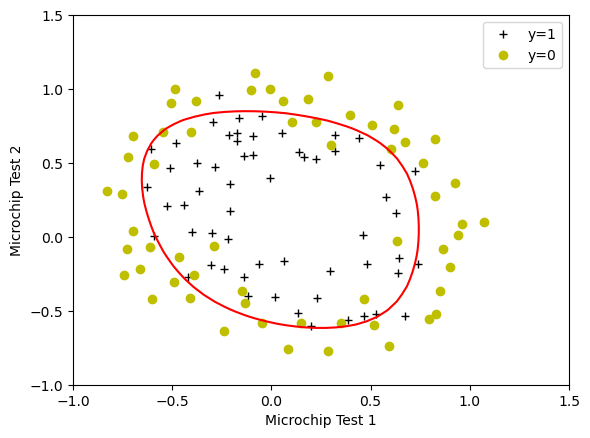

In [18]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

**Comment:**

- The decisive boundary of the model (red line) is quite matching the classification of the data set. 
- The more data points lying away from the boundaries are, the more likely to be accurate and vice versa.

### 4.5 Save Results

**Save the trained model to the file `model.json`**

In [19]:
#Save model
"""
w : (array_like Shape (n,))      Parameters of the model
b : (scalar, float)              Parameter of the model
"""
with open('model.json', 'w') as f:
    json.dump({'w: ': dict(enumerate(map(str, w))),
               'b: ': b},
                f)

**Save the assessment results in the file `classification_report.json`**

In [20]:
class_0 = dict({"Precision": scores[0,0],
      "Recall": scores[0,1],
      "F1": scores[0,2]})

class_1 = dict({"Precision": scores[1,0],
      "Recall": scores[1,1],
      "F1": scores[1,2]})


In [21]:
with open('classification_report.json', 'w') as f:
    json.dump({'Accuracy: ': accuracy,
                'Class 0: ': class_0,
                'Class 1: ': class_1},
                f)

# 5. Referent

Refer to lab assignment from the course:

- Course name: Machine Learning Specialization
- Offered By: Stanford
- Platform: Cousera
- Course 1: Supervised Machine Learning: Regression and Classification